# Stroke Prediction 
Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
* 1) id: unique identifier
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

In [1]:
# Libraries Used
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, plot_confusion_matrix, precision_score

In [2]:
df = pd.read_csv("C:/Users/schne/Desktop/Stroke/healthcare-dataset-stroke-data.csv")
df = df.dropna()
df = df[df.gender != 'Other']
display(df.tail())
print(df.shape)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


(4908, 12)


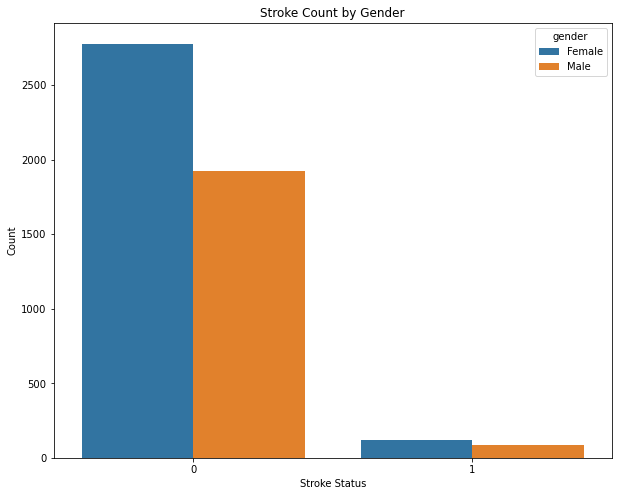

In [3]:
Counts_df = df.groupby(by =['stroke','gender']).count().reset_index()
Counts_df
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = 'stroke', y = 'id', hue = 'gender', data = Counts_df)
plt.xlabel('Stroke Status')
plt.ylabel("Count")
plt.title("Stroke Count by Gender")
plt.show()

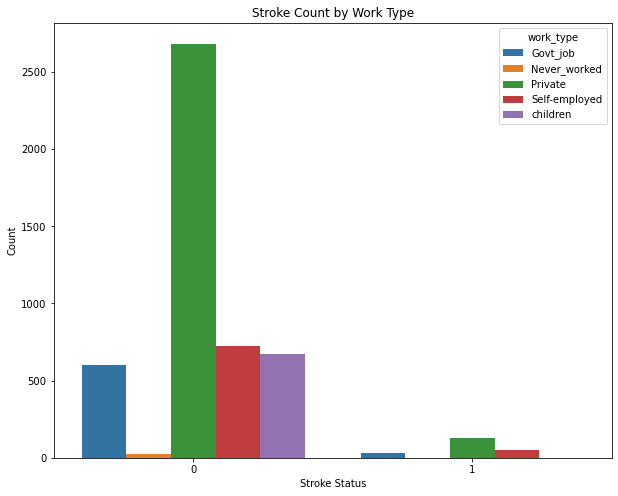

In [4]:
Counts_df = df.groupby(by =['stroke','work_type']).count().reset_index()
Counts_df
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = 'stroke', y = 'id', hue = 'work_type', data = Counts_df)
plt.xlabel('Stroke Status')
plt.ylabel("Count")
plt.title("Stroke Count by Work Type")
plt.show()

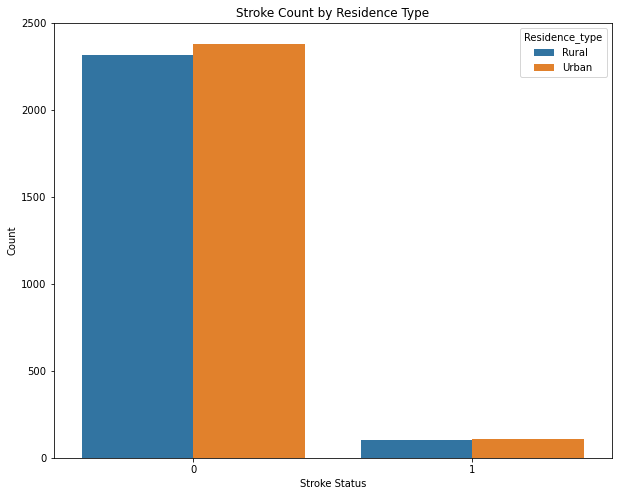

In [5]:
Counts_df = df.groupby(by =['stroke','Residence_type']).count().reset_index()
Counts_df
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = 'stroke', y = 'id', hue = 'Residence_type', data = Counts_df)
plt.xlabel('Stroke Status')
plt.ylabel("Count")
plt.title("Stroke Count by Residence Type")
plt.show()

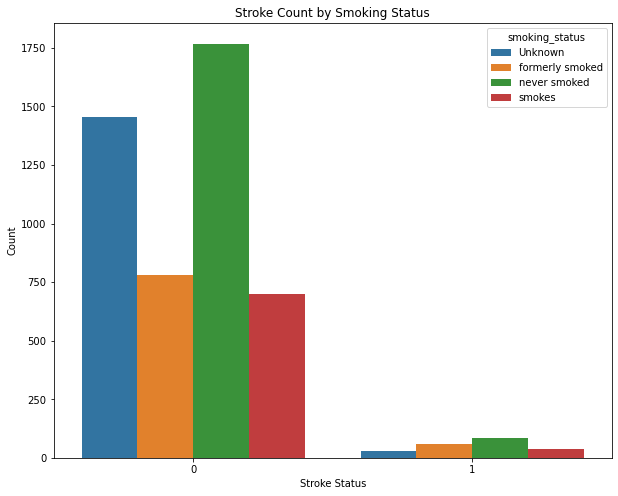

In [6]:
Counts_df = df.groupby(by =['stroke','smoking_status']).count().reset_index()
Counts_df
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = 'stroke', y = 'id', hue = 'smoking_status', data = Counts_df)
plt.xlabel('Stroke Status')
plt.ylabel("Count")
plt.title("Stroke Count by Smoking Status")
plt.show()

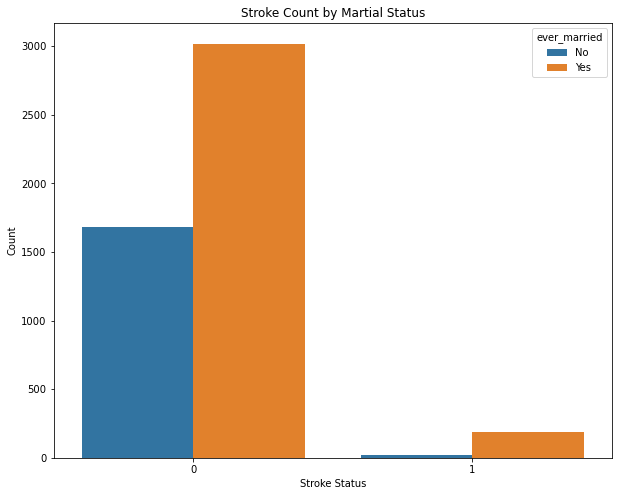

In [7]:
Counts_df = df.groupby(by =['stroke','ever_married']).count().reset_index()
Counts_df
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = 'stroke', y = 'id', hue = 'ever_married', data = Counts_df)
plt.xlabel('Stroke Status')
plt.ylabel("Count")
plt.title("Stroke Count by Martial Status")
plt.show()

In [8]:
X = df[['bmi','age','hypertension','heart_disease','avg_glucose_level']]
Y = df['stroke']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 7991, stratify = Y)
X_train

,bmi,age,hypertension,heart_disease,avg_glucose_level
3732,32.8,52.0,1,0,116.21
976,38.0,59.0,0,0,88.81
2264,30.4,67.0,0,0,58.51
291,20.0,4.0,0,0,79.17
1674,19.8,65.0,0,0,82.26
...,...,...,...,...,...
760,32.7,39.0,0,0,77.54
585,34.5,65.0,0,1,196.36
140,25.0,82.0,0,1,103.68
1402,21.2,57.0,0,0,85.99


In [9]:

f1 = make_scorer(f1_score , average='macro')

clf = svm.SVC(kernel='rbf') 

Paramater_Grid = {"C": [1,10,100,1000,10000],
                     "gamma": [1,0.1,0.01,0.001,0.0001]}
Grid_Svm = GridSearchCV(clf,Paramater_Grid, refit=True, verbose = 1, cv =15,scoring=f1)

Grid_Searched = Grid_Svm.fit(X_train, Y_train)

Y_pred = Grid_Searched.predict(X_test)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  8.4min finished


In [10]:
Y_pred = Grid_Searched.predict(X_test)

In [11]:
print(Grid_Searched.best_params_)
t_acc = accuracy_score(Y_test, Y_pred) * 100
print(t_acc)

{'C': 10000, 'gamma': 0.001}
95.11201629327903


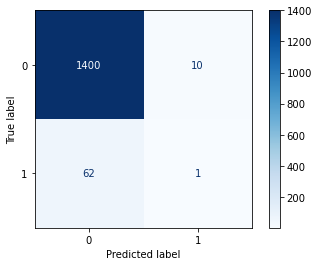

In [12]:
confusion_matrix(Y_test, Y_pred)
disp = plot_confusion_matrix(Grid_Svm, X_test, Y_test, cmap = plt.cm.Blues)

In [13]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))

Accuracy: 0.9511201629327902
Precision: 0.09090909090909091


In [14]:
metrics.f1_score(Y_test, Y_pred, average='weighted', labels=np.unique(Y_pred))

0.9343886716141622

### NB Classifer

In [15]:
NB_Model = GaussianNB()

NB_Model.fit(X_train, Y_train)

Y_pred_NB = NB_Model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_NB))
print("Precision:",metrics.precision_score(Y_test, Y_pred_NB))

Accuracy: 0.878479293957909
Precision: 0.15060240963855423


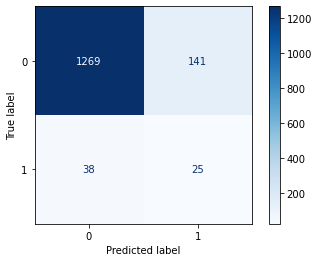

In [16]:
confusion_matrix(Y_test, Y_pred_NB)
disp = plot_confusion_matrix(NB_Model, X_test, Y_test, cmap = plt.cm.Blues)